

---

<center><h1>Assignment 4</h1></center>

---

# 1. <font color='#556b2f'> **Support Vector Machines with Synthetic Data**</font>, 50 points. 

For this problem, we will generate synthetic data for a nonlinear binary classification problem and partition it into training, validation and test sets. Our goal is to understand the behavior of SVMs with Radial-Basis Function (RBF) kernels with different values of $C$ and $\gamma$.

In [1]:
# DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH DATA GENERATION, 
# MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def generate_data(n_samples, tst_frac=0.2, val_frac=0.2):
  # Generate a non-linear data set
  X, y = make_moons(n_samples=n_samples, noise=0.25, random_state=42)
   
  # Take a small subset of the data and make it VERY noisy; that is, generate outliers
  m = 30
  np.random.seed(30)  # Deliberately use a different seed
  ind = np.random.permutation(n_samples)[:m]
  X[ind, :] += np.random.multivariate_normal([0, 0], np.eye(2), (m, ))
  y[ind] = 1 - y[ind]

  # Plot this data
  cmap = ListedColormap(['#b30065', '#178000'])  
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
  
  # First, we use train_test_split to partition (X, y) into training and test sets
  X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac, 
                                                random_state=42)

  # Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
  X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, 
                                                random_state=42)
  
  return (X_trn, y_trn), (X_val, y_val), (X_tst, y_tst)

In [2]:
#
#  DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH VISUALIZATION, 
#  MAKE A COPY OF THIS FUNCTION AND THEN EDIT 
#

def visualize(models, param, X, y):
  # Initialize plotting
  if len(models) % 3 == 0:
    nrows = len(models) // 3
  else:
    nrows = len(models) // 3 + 1
    
  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5.0 * nrows))
  cmap = ListedColormap(['#b30065', '#178000'])

  # Create a mesh
  xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
  yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
  xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.01), 
                             np.arange(yMin, yMax, 0.01))

  for i, (p, clf) in enumerate(models.items()):
    # if i > 0:
    #   break
    r, c = np.divmod(i, 3)
    ax = axes[r, c]

    # Plot contours
    zMesh = clf.decision_function(np.c_[xMesh.ravel(), yMesh.ravel()])
    zMesh = zMesh.reshape(xMesh.shape)
    ax.contourf(xMesh, yMesh, zMesh, cmap=plt.cm.PiYG, alpha=0.6)

    if (param == 'C' and p > 0.0) or (param == 'gamma'):
      ax.contour(xMesh, yMesh, zMesh, colors='k', levels=[-1, 0, 1], 
                 alpha=0.5, linestyles=['--', '-', '--'])

    # Plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
    ax.set_title('{0} = {1}'.format(param, p))

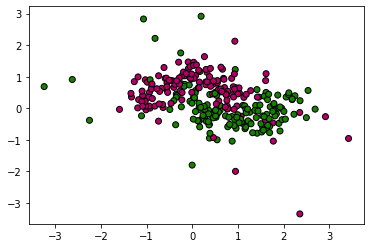

In [3]:
# Generate the data
n_samples = 300    # Total size of data set 
(X_trn, y_trn), (X_val, y_val), (X_tst, y_tst) = generate_data(n_samples)

---
### **a**. (25 points)  The effect of the regularization parameter, $C$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $\gamma$ and various choices of $C \in \{10^{-3}, 10^{-2}\, \cdots, 1, \, \cdots\, 10^5\}$. The value of $\gamma$ is fixed to $\gamma = \frac{1}{d \cdot \sigma_X}$, where $d$ is the data dimension and $\sigma_X$ is the standard deviation of the data set $X$. SVC can automatically use these setting for $\gamma$ if you pass the argument gamma = 'scale' (see documentation for more details).

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $C$? Based on the visualization of the models and their resulting classifiers, how does changing $C$ change the models? Explain in terms of minimizing the SVM's objective function $\frac{1}{2} \mathbf{w}^\prime \mathbf{w} \, + \, C \, \Sigma_{i=1}^n \, \ell(\mathbf{w} \mid \mathbf{x}_i, y_i)$, where $\ell$ is the hinge loss for each training example $(\mathbf{x}_i, y_i)$.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $C_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$_.

Best value for C is 10.0


'Accuracy for model with 10.0 is, 83.33333333333334 percent'

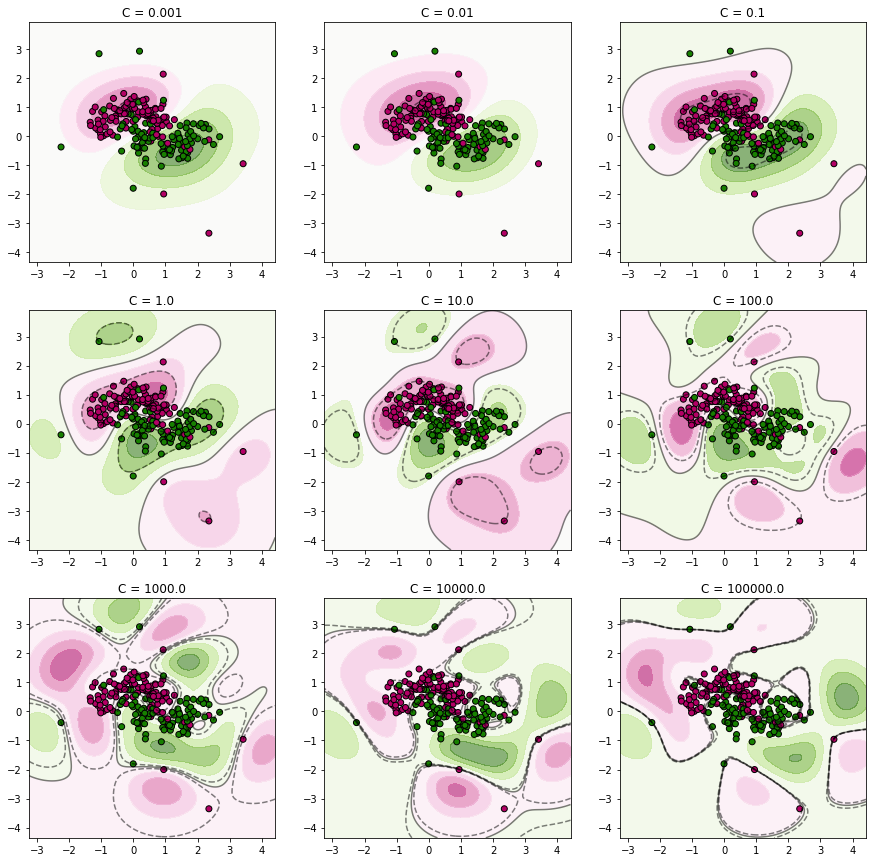

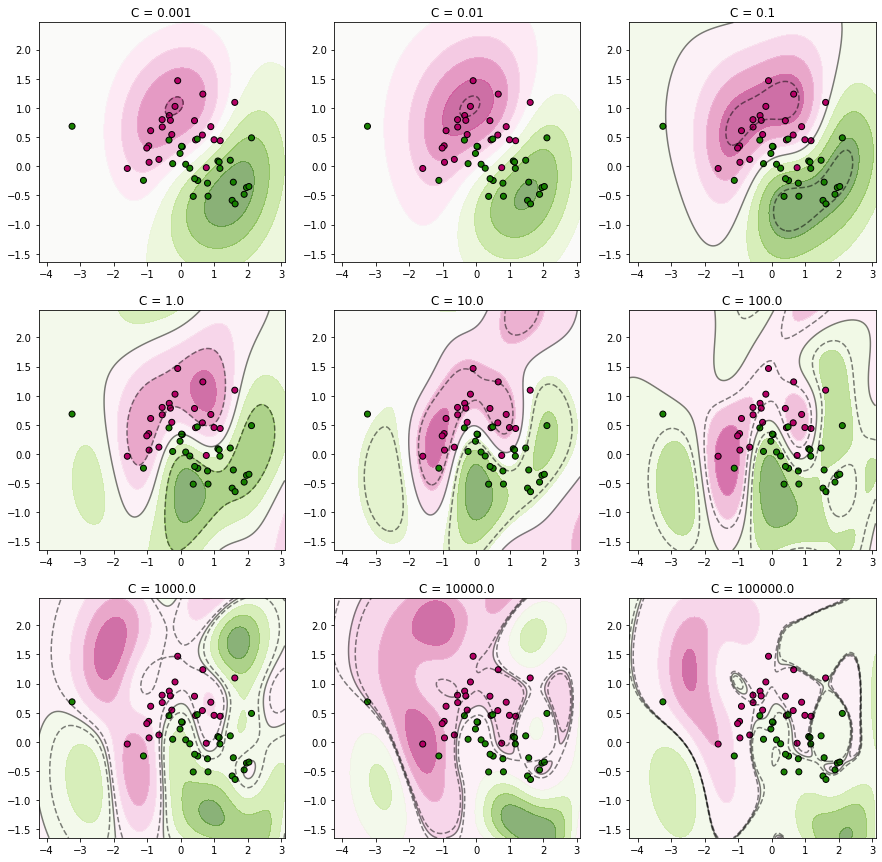

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
C_range = np.arange(-3.0, 6.0, 1.0)
C_values = np.power(10.0, C_range)

models = dict()
trnErr = dict()
valErr = dict()

for C in C_values:
    clf=SVC(C,random_state=100)
    models[C]=clf.fit(X_trn, y_trn)
    yValidationPred = models[C].predict(X_val)
    yTrainPred= models[C].predict(X_trn)
    valErr[C] = 1-accuracy_score(y_val, yValidationPred)
    trnErr[C] = 1-accuracy_score(y_trn, yTrainPred)

   
  
visualize(models, 'C', X_trn, y_trn)
visualize(models, 'C', X_val, y_val)

diffErr = dict()
for each in trnErr:
    diffErr[each] = abs(trnErr[each] - valErr[each])
cBest = 0
minError = min(list(diffErr.values()))
for i in diffErr:
    if diffErr[i] == minError:
        cBest = i
    
y_pred_tst = models[cBest].predict(X_tst)
accuracy = accuracy_score(y_tst, y_pred_tst)
print( 'Best value for C is', cBest)
f'Accuracy for model with {cBest} is, {accuracy*100} percent'

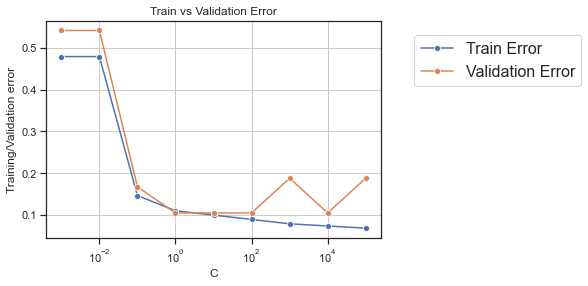

In [5]:
import seaborn as sns
sns.set(style="ticks")
sns.lineplot(trnErr.keys(), trnErr.values(),marker="o")
sns.lineplot(valErr.keys(), valErr.values(),marker="o")
plt.xlabel('C')
plt.ylabel('Training/Validation error') 
plt.xticks(list(valErr.keys()))
plt.title('Train vs Validation Error')
plt.legend(['Train Error', 'Validation Error'], fontsize=16,loc=[1.1,.7])
plt.xscale('log')
plt.grid()

# Discussion

As the value of C increases, the training error decreases but the validation error decreases at the start with an increase in C and then increases after the value of C reaches 1000.
In the training data, increasing the value of C results in the hyperplane correctly classifies all the training data points. 
Hence the training error decreases as we increase the C parameter. This indicates that we are trying to reduce the error due to the misclassified points, hence the hinge loss.
But this increase in the C value does not result in good accuracy over the validation data set. The error on the validation first decreases and then increases. We can observe that for a value of C = 10 the difference in error for train and validation error is minimum.
Therefore, the best value of C is 10.

---
### **b**. (25 points)  The effect of the RBF kernel parameter, $\gamma$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns various non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $C$ and various choices of $\gamma \in \{10^{-2}, 10^{-1}\, 1, 10, \, 10^2 \, 10^3\}$. The value of $C$ is fixed to $C = 10$.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $\gamma$? Based on the visualization of the models and their resulting classifiers, how does changing $\gamma$ change the models? Explain in terms of the functional form of the RBF kernel, $\kappa(\mathbf{x}, \,\mathbf{z}) \, = \, \exp(-\gamma \cdot \|\mathbf{x} - \mathbf{z} \|^2)$

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $\gamma_{best}$_.

In [ ]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed C = 10.0 and different values of gamma
gamma_range = np.arange(-2.0, 4.0, 1.0)
gamma_values = np.power(10.0, gamma_range)

models = dict()
trnErr = dict()
valErr = dict()

for G in gamma_values:
    clf = SVC(C = 10, gamma = G,random_state=100)
    models[G]=clf.fit(X_trn, y_trn)
    yValidationPred = models[G].predict(X_val)
    yTrainPred= models[G].predict(X_trn)
    trnErr[G] = 1-accuracy_score(y_trn, yTrainPred)
    valErr[G] = 1-accuracy_score(y_val, yValidationPred)
    
visualize(models, 'gamma', X_trn, y_trn)
visualize(models, 'gamma', X_val, y_val)

diffErr = dict()
for each in trnErr:
    diffErr[each] = abs(trnErr[each] - valErr[each])
gBest = 0
minError = min(list(diffErr.values()))
for i in diffErr:
    if diffErr[i] == minError:
        gBest = i
    
y_pred_tst = models[gBest].predict(X_tst)
accuracy = accuracy_score(y_tst, y_pred_tst)
print( 'Best value for G is', gBest)
f'Accuracy for model with {gBest} is, {accuracy*100} percent'

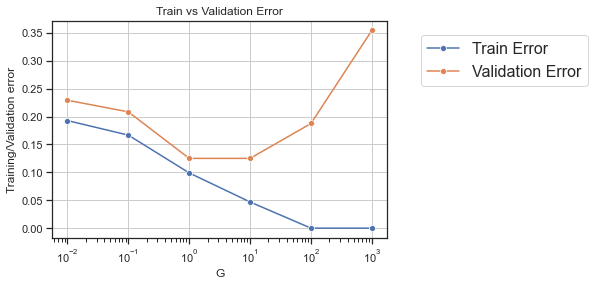

In [76]:
import seaborn as sns
sns.set(style="ticks")
sns.lineplot(trnErr.keys(), trnErr.values(),marker="o")
sns.lineplot(valErr.keys(), valErr.values(),marker="o")
plt.xlabel('G')
plt.ylabel('Training/Validation error') 
plt.xticks(list(valErr.keys()))
plt.title('Train vs Validation Error')
plt.legend(['Train Error', 'Validation Error'], fontsize=16,loc=[1.1,.7])
plt.xscale('log')
plt.grid()

# Discussion

As the value of G increases, The training error decreases but the validation error first decreases and then increases after the value of G reaches 10.
In the training data, increasing the value of the G gives a model which overfits the given data set. 
With the increase in the value of gamma every point close to the decision boundary is given a higher weight, hence it results in a model with very little train error. In contrast with low gamma value, only points that are far away from the decision boundary are given high weights resulting in an underfit model. Hence, we need to choose a gamma value that is a tradeoff between overfitting and underfitting.
We could observe the difference between the train and validation error is minimum for gamma = 1.

---
# 2. <font color='#556b2f'> **Breast Cancer Diagnosis with Support Vector Machines**</font>, 25 points. 

For this problem, we will use the [Wisconsin Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) data set, which has already been pre-processed and partitioned into training, validation and test sets. Numpy's [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) command can be used to load CSV files.

In [79]:
with open('wdbc_trn.csv') as fTrn:                   
    nColsTrn = len(fTrn.readline().split(','))
with open('wdbc_tst.csv') as fTst:                   
    nColsTst = len(fTst.readline().split(','))
with open('wdbc_val.csv') as fVal:                   
    nColsVal = len(fVal.readline().split(','))
    
y_trn = np.loadtxt('wdbc_trn.csv', delimiter = ',', usecols=0)
x_trn = np.loadtxt('wdbc_trn.csv', delimiter = ',', usecols=range(1,nColsTrn))
y_tst = np.loadtxt('wdbc_tst.csv', delimiter = ',', usecols=0)
x_tst = np.loadtxt('wdbc_tst.csv', delimiter = ',', usecols=range(1,nColsTst))
y_val = np.loadtxt('wdbc_val.csv', delimiter = ',', usecols=0)
x_val = np.loadtxt('wdbc_val.csv', delimiter = ',', usecols=range(1,nColsVal))

Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for **each combination** of $C \in \{10^{-2}, 10^{-1}, 1, 10^1, \, \cdots\, 10^4\}$ and $\gamma \in \{10^{-3}, 10^{-2}\, 10^{-1}, 1, \, 10, \, 10^2\}$. Print the tables corresponding to the training and validation errors.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter values, $C_{best}$ and $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$ and $\gamma_{best}$_.

In [80]:
import pandas as pd
C_range = np.arange(-2.0, 5.0, 1.0)
C_values = np.power(10.0, C_range)

G_range = np.arange(-3.0, 2.0, 1.0)
G_values = np.power(10.0, G_range)

minimumErr=1
models = dict()
trnErr = dict()
valErr = dict()

for c in C_values:
    for g in G_values:
        clf = SVC(kernel = 'rbf', C = c, gamma = g)
        models[(c,g)] = clf.fit(x_trn, y_trn)
        y_val_pred = models[(c,g)].predict(x_val)
        y_trn_pred = models[(c,g)].predict(x_trn)
        trnErr[(c,g)] = 1-accuracy_score(y_trn, y_trn_pred)
        valErr[(c,g)] = 1-accuracy_score(y_val, y_val_pred)
        if valErr[(c,g)]<minimumErr:
            minimumErr=valErr[(c,g)]
            G_best=g
            C_best=c
        elif valErr[(c,g)]==minimumErr:
            G_best=g
            C_best=c
            
trn_table = pd.DataFrame(list(trnErr.items()), columns = ['Combination', 'TrainError'])
print(trn_table)
val_table = pd.DataFrame(list(valErr.items()), columns = ['Combination', 'ValidationError'])
print(val_table)
y_pred_tst = models[(C_best,G_best)].predict(x_tst)
a = accuracy_score(y_tst, y_pred_tst)
print('Best value for G is', G_best)
print('Best value for C is', C_best)
print('Accuracy for the best model is', a*100, 'percent' )




         Combination  TrainError
0      (0.01, 0.001)    0.371681
1       (0.01, 0.01)    0.371681
2        (0.01, 0.1)    0.371681
3        (0.01, 1.0)    0.371681
4       (0.01, 10.0)    0.371681
5       (0.1, 0.001)    0.306785
6        (0.1, 0.01)    0.050147
7         (0.1, 0.1)    0.035398
8         (0.1, 1.0)    0.371681
9        (0.1, 10.0)    0.371681
10      (1.0, 0.001)    0.047198
11       (1.0, 0.01)    0.029499
12        (1.0, 0.1)    0.011799
13        (1.0, 1.0)    0.000000
14       (1.0, 10.0)    0.000000
15     (10.0, 0.001)    0.026549
16      (10.0, 0.01)    0.011799
17       (10.0, 0.1)    0.000000
18       (10.0, 1.0)    0.000000
19      (10.0, 10.0)    0.000000
20    (100.0, 0.001)    0.014749
21     (100.0, 0.01)    0.002950
22      (100.0, 0.1)    0.000000
23      (100.0, 1.0)    0.000000
24     (100.0, 10.0)    0.000000
25   (1000.0, 0.001)    0.005900
26    (1000.0, 0.01)    0.000000
27     (1000.0, 0.1)    0.000000
28     (1000.0, 1.0)    0.000000
29    (100

---
# 3. <font color='#556b2f'> **Breast Cancer Diagnosis with $k$-Nearest Neighbors**</font>, 25 points. 

Use scikit-learn's [k-nearest neighbor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) classifier to learn models for Breast Cancer Diagnosis with $k \in \{1, \, 5, \, 11, \, 15, \, 21\}$, with the kd-tree algorithm.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter value, $k_{best}$. Report the accuracy on the **test set** for this selected best kNN model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $k_{best}$_.

In [81]:
from sklearn.neighbors import KNeighborsClassifier

K = [1, 5, 11, 15, 21]
models = dict()
trnErr = dict()
valErr = dict()

for k in K:
    KNN = KNeighborsClassifier(n_neighbors=k, algorithm = 'kd_tree')
    models[k] = KNN.fit(x_trn, y_trn)
    y_trn_pred = models[k].predict(x_trn)
    y_val_pred = models[k].predict(x_val)
    trnErr[k] = 1-accuracy_score(y_trn, y_trn_pred)
    valErr[k] = 1-accuracy_score(y_val, y_val_pred)
    

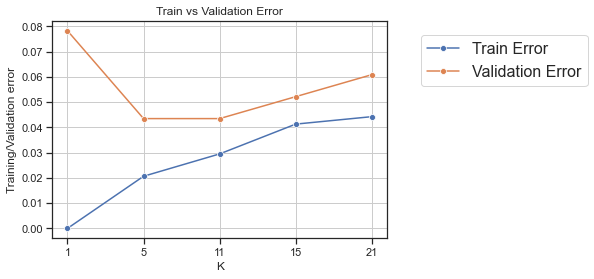

In [82]:
import seaborn as sns
sns.set(style="ticks")
k = list(range(len(K)))
sns.lineplot(k, list(trnErr.values()),marker="o")
sns.lineplot(k, list(valErr.values()),marker="o")
plt.plot()
plt.xlabel('K')
plt.ylabel('Training/Validation error') 
plt.xticks(k, K)
plt.title('Train vs Validation Error')
plt.legend(['Train Error', 'Validation Error'], fontsize=16,loc=[1.1,.7])
plt.grid()
plt.show()


From the above graph, we can consider k=11 as the better value.
Since higher values of k after 11 results in increasing of both validation and training error.

In [83]:
y_pred_tst = models[11].predict(x_tst)
accuracy = accuracy_score(y_tst, y_pred_tst)
print('Best value for K is', 11)
print('Accuracy for the best model is', accuracy*100, 'percent' )

Best value for K is 11
Accuracy for the best model is 97.3913043478261 percent


**Discussion**: Which of these two approaches, SVMs or kNN, would you prefer for this classification task? Explain.

We achieved an accuracy of 94.7% and 97.39% for SVM and KNN models respectively.
KNN achieved better accuracy when compared to SVM, therefore we can infer that the data is not easily separable with decision planes when compared to KNN. So we prefer using KNN for this classification task.
Since here the dataset has 30 features, we can go with KNN. 